# Machine Learning Nhóm 8 

## Project: Stock Price Predictor

* Mục đích của dự án này là dự đoán chính xác giá trị đóng cửa trong tương lai của một cổ phiếu nhất định trong một khoảng thời gian nhất định trong tương lai.
* (http://colah.github.io/posts/2015-08-Understanding-LSTMs/)
* (https://en.wikipedia.org/wiki/List_of_S%26P_500_companies)

## Lấy dữ liệu

Crawl dữ liệu trên trang CafeF

   **Bước 1 :** Sử dụng tập dữ liệu chứng khoán của VNA

In [94]:
import pandas as pd
import datetime
import numpy as np

In [95]:
data = pd.read_csv('VNA.csv', header=0)


 **Bước 2:** Xem bộ dữ liệu VNA

In [96]:
data.shape
data

,Unnamed: 0,Ngày,Giá điều chỉnh,Giá đóng cửa,Giá bình quân,thay đổi,KL1,GT1,KL2,GT2,Giá tham chiếu,Giá mở cửa,Giá cao nhất,Giá thấp nhất
0,0,09/12/2021,33.4,33.4,33.40,0.70 (2.14 %),"127,191","4,248,383,000",0,0,32.70,32.5,34.0,32.5
1,1,08/12/2021,32.7,32.7,32.70,0.20 (0.62 %),"97,900","3,196,500,000",0,0,32.50,33.0,33.1,32.3
2,2,07/12/2021,32.8,32.8,32.80,0.10 (0.31 %),"127,404","4,135,342,600",0,0,32.70,32.0,33.0,32.0
3,3,06/12/2021,32.2,32.2,32.20,-0.90 (-2.72 %),"174,710","5,710,207,000",0,0,33.10,32.6,33.4,31.5
4,4,03/12/2021,32.6,32.6,32.60,-1.20 (-3.55 %),"110,027","3,643,343,000",0,0,33.80,33.6,34.0,32.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,3278,15/09/2008,38.2,38.2,27.15,11.26 (41.82 %),"484,330","18,711,456,000",0,0,26.94,37.9,39.7,37.9
3279,3279,12/09/2008,37.9,37.9,26.94,9.61 (33.99 %),"2,480","93,992,000",0,0,28.29,37.9,37.9,37.9
3280,3280,11/09/2008,39.8,39.8,28.29,10.09 (33.97 %),"35,120","1,397,776,000",0,0,29.71,39.8,39.8,39.8
3281,3281,10/09/2008,41.8,41.8,29.71,10.53 (33.67 %),"223,650","9,348,730,000","31,000","1,295,800,000",31.27,41.8,41.9,41.8


# Check Point #1

Đã crawl data và load vào DataFrame

## Tiền xử lí dữ liệu

Chúng ta sẽ tiền xử lí dữ liêu và chuẩn hóa nó để dự đoán tốt hơn

**Bước 1 :** Kiểm tra kiểu dữ liệu của các trường 

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283 entries, 0 to 3282
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3283 non-null   int64  
 1   Ngày            3283 non-null   object 
 2   Giá điều chỉnh  3283 non-null   float64
 3   Giá đóng cửa    3283 non-null   float64
 4   Giá bình quân   3283 non-null   float64
 5   thay đổi        3283 non-null   object 
 6   KL1             3283 non-null   object 
 7   GT1             3283 non-null   object 
 8   KL2             3283 non-null   object 
 9   GT2             3283 non-null   object 
 10  Giá tham chiếu  3283 non-null   float64
 11  Giá mở cửa      3283 non-null   float64
 12  Giá cao nhất    3283 non-null   float64
 13  Giá thấp nhất   3283 non-null   float64
dtypes: float64(7), int64(1), object(6)
memory usage: 359.2+ KB


* Ta thấy, tập dữ liệu hiện tại có 7(float64), 1(int64) và 6(object)
* Ta cần chuyển `Ngày` sang dạng `DateTime`
* `thay đổi`, `KL1`, `GT1`, `KL2`, `GT2` sang `float64`

In [98]:
data

,Unnamed: 0,Ngày,Giá điều chỉnh,Giá đóng cửa,Giá bình quân,thay đổi,KL1,GT1,KL2,GT2,Giá tham chiếu,Giá mở cửa,Giá cao nhất,Giá thấp nhất
0,0,09/12/2021,33.4,33.4,33.40,0.70 (2.14 %),"127,191","4,248,383,000",0,0,32.70,32.5,34.0,32.5
1,1,08/12/2021,32.7,32.7,32.70,0.20 (0.62 %),"97,900","3,196,500,000",0,0,32.50,33.0,33.1,32.3
2,2,07/12/2021,32.8,32.8,32.80,0.10 (0.31 %),"127,404","4,135,342,600",0,0,32.70,32.0,33.0,32.0
3,3,06/12/2021,32.2,32.2,32.20,-0.90 (-2.72 %),"174,710","5,710,207,000",0,0,33.10,32.6,33.4,31.5
4,4,03/12/2021,32.6,32.6,32.60,-1.20 (-3.55 %),"110,027","3,643,343,000",0,0,33.80,33.6,34.0,32.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,3278,15/09/2008,38.2,38.2,27.15,11.26 (41.82 %),"484,330","18,711,456,000",0,0,26.94,37.9,39.7,37.9
3279,3279,12/09/2008,37.9,37.9,26.94,9.61 (33.99 %),"2,480","93,992,000",0,0,28.29,37.9,37.9,37.9
3280,3280,11/09/2008,39.8,39.8,28.29,10.09 (33.97 %),"35,120","1,397,776,000",0,0,29.71,39.8,39.8,39.8
3281,3281,10/09/2008,41.8,41.8,29.71,10.53 (33.67 %),"223,650","9,348,730,000","31,000","1,295,800,000",31.27,41.8,41.9,41.8


In [99]:
# process colum 'change'
data[['Change_Value','Change_Percent']] = data['thay đổi'].str.split("(",expand=True)
data['Change_Value'] = data['Change_Value'].str[:-1]
data['Change_Percent'] = (data['Change_Percent'].str)[:-3]
data['Change_Percent'] = data['Change_Percent'].astype(float)
data['Change_Value'] = data['Change_Value'].astype(float)

Tách dữ liệu ở cột `thay đổi` thành 2 cột mới

In [100]:
data['KL1'] = data['KL1'].str.replace(",", '')
data['KL1'] =data['KL1'].astype(float)
data['GT1'] = data['GT1'].str.replace(",", '')
data['GT1'] =data['GT1'].astype(float)

data['KL2'] = data['KL2'].str.replace(",", '')
data['KL2'] =data['KL2'].astype(float)
data['GT2'] = data['GT2'].str.replace(",", '')
data['GT2'] =data['GT2'].astype(float)

data['KL'] = data['KL1'] + data['KL2']
data['GT'] = data['GT1'] + data['GT2']

Chuyển các cột KL1, GT1, KL2, GT2 về kiểu float và gộp thành 2 cột là KL và GT

In [101]:
# convert object to datetime
data['Ngày'] = pd.to_datetime(data['Ngày'], format='%d/%m/%Y')

Chuyển đổi cột Ngày sang dữ liệu Datetime

In [102]:
data = data.drop(columns=['Unnamed: 0', 'thay đổi', 'KL1', 'GT1', 'KL2', 'GT2'])

Xóa các cột không cần thiết

In [103]:
data.describe()

,Giá điều chỉnh,Giá đóng cửa,Giá bình quân,Giá tham chiếu,Giá mở cửa,Giá cao nhất,Giá thấp nhất,Change_Value,Change_Percent,KL,GT
count,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3.283000e+03,3.283000e+03
mean,7.099845,7.100366,6.282175,6.274755,7.100040,7.253667,6.928620,0.825681,6.309034,8.402926e+04,1.198481e+09
std,8.418407,8.418170,7.296647,7.299473,8.436545,8.640416,8.194641,1.759081,11.904480,1.497477e+05,4.106169e+09
min,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,-5.000000,-14.890000,0.000000e+00,0.000000e+00
25%,2.400000,2.400000,2.400000,2.400000,2.400000,2.500000,2.300000,0.000000,0.000000,6.075000e+03,1.621950e+07
50%,3.200000,3.200000,3.200000,3.200000,3.200000,3.300000,3.100000,0.000000,0.000000,3.043000e+04,1.149460e+08
75%,7.950000,7.950000,7.100000,7.100000,8.000000,8.000000,7.800000,0.500000,10.530000,8.780000e+04,5.646203e+08
max,47.800000,47.800000,47.800000,47.100000,49.000000,49.900000,45.000000,12.880000,47.630000,1.968839e+06,6.431901e+10


In [104]:
data

,Ngày,Giá điều chỉnh,Giá đóng cửa,Giá bình quân,Giá tham chiếu,Giá mở cửa,Giá cao nhất,Giá thấp nhất,Change_Value,Change_Percent,KL,GT
0,2021-12-09,33.4,33.4,33.40,32.70,32.5,34.0,32.5,0.70,2.14,127191.0,4.248383e+09
1,2021-12-08,32.7,32.7,32.70,32.50,33.0,33.1,32.3,0.20,0.62,97900.0,3.196500e+09
2,2021-12-07,32.8,32.8,32.80,32.70,32.0,33.0,32.0,0.10,0.31,127404.0,4.135343e+09
3,2021-12-06,32.2,32.2,32.20,33.10,32.6,33.4,31.5,-0.90,-2.72,174710.0,5.710207e+09
4,2021-12-03,32.6,32.6,32.60,33.80,33.6,34.0,32.6,-1.20,-3.55,110027.0,3.643343e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
3278,2008-09-15,38.2,38.2,27.15,26.94,37.9,39.7,37.9,11.26,41.82,484330.0,1.871146e+10
3279,2008-09-12,37.9,37.9,26.94,28.29,37.9,37.9,37.9,9.61,33.99,2480.0,9.399200e+07
3280,2008-09-11,39.8,39.8,28.29,29.71,39.8,39.8,39.8,10.09,33.97,35120.0,1.397776e+09
3281,2008-09-10,41.8,41.8,29.71,31.27,41.8,41.9,41.8,10.53,33.67,254650.0,1.064453e+10


In [105]:
df = data.iloc[::-1]
df.to_csv('VNA_preprocessed.csv',index= False)

Đảo dữ liệu theo thứ tự từ quá khứ đến tương lai

In [106]:
stocks = pd.read_csv('VNA_preprocessed.csv', header=0)

In [107]:
stocks

,Ngày,Giá điều chỉnh,Giá đóng cửa,Giá bình quân,Giá tham chiếu,Giá mở cửa,Giá cao nhất,Giá thấp nhất,Change_Value,Change_Percent,KL,GT
0,2008-09-09,44.0,44.0,31.27,46.00,49.0,49.9,43.5,-2.00,-4.35,309380.0,1.423669e+10
1,2008-09-10,41.8,41.8,29.71,31.27,41.8,41.9,41.8,10.53,33.67,254650.0,1.064453e+10
2,2008-09-11,39.8,39.8,28.29,29.71,39.8,39.8,39.8,10.09,33.97,35120.0,1.397776e+09
3,2008-09-12,37.9,37.9,26.94,28.29,37.9,37.9,37.9,9.61,33.99,2480.0,9.399200e+07
4,2008-09-15,38.2,38.2,27.15,26.94,37.9,39.7,37.9,11.26,41.82,484330.0,1.871146e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
3278,2021-12-03,32.6,32.6,32.60,33.80,33.6,34.0,32.6,-1.20,-3.55,110027.0,3.643343e+09
3279,2021-12-06,32.2,32.2,32.20,33.10,32.6,33.4,31.5,-0.90,-2.72,174710.0,5.710207e+09
3280,2021-12-07,32.8,32.8,32.80,32.70,32.0,33.0,32.0,0.10,0.31,127404.0,4.135343e+09
3281,2021-12-08,32.7,32.7,32.70,32.50,33.0,33.1,32.3,0.20,0.62,97900.0,3.196500e+09


**Bước 2 :** Visualize tập dữ liệu vừa được tiền xử lí

In [108]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 12)

In [109]:
def price(x):
    """
    format the coords message box
    :param x: data to be formatted
    :return: formatted data
    """
    return '$%1.2f' % x

In [110]:
def plot_basic(stocks, title='VNA DATA', y_label='Giá Đóng Cửa', x_label='Ngày Giao Dịch'):
    fig, ax = plt.subplots()
    ax.plot(stocks['Ngày'], stocks['Giá đóng cửa'], '#0A7388')

    ax.format_ydata = price
    ax.set_title(title)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    plt.show()

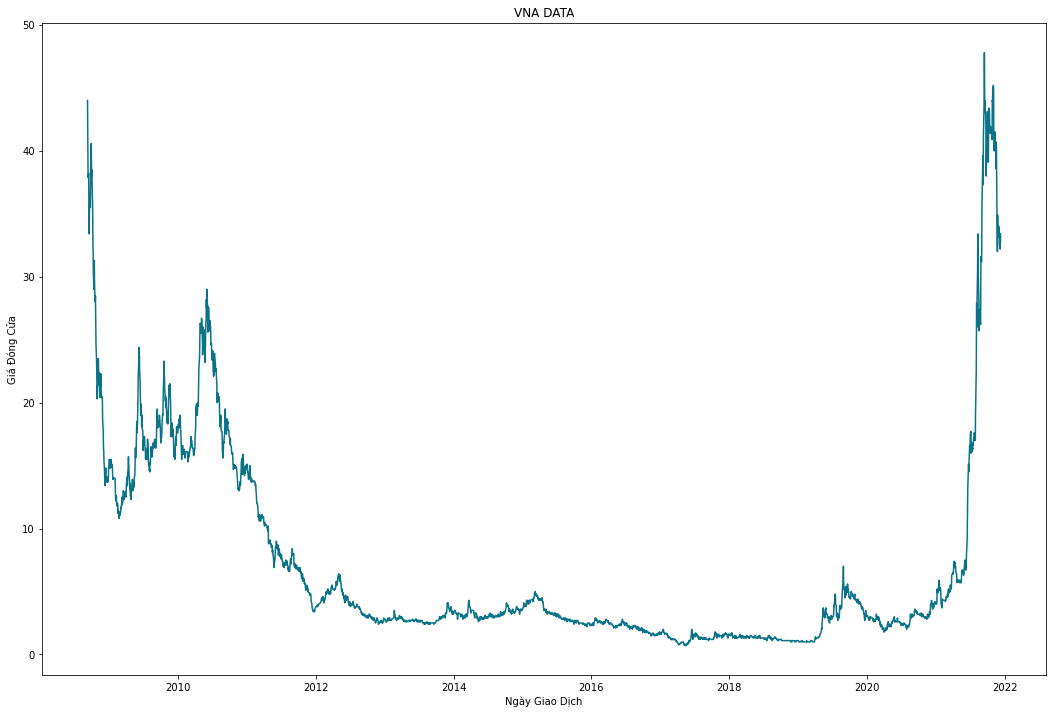

In [111]:
plot_basic(data)

**Bước 3 :** Chuẩn hóa dữ liệu số bằng hàm minmaxscaler

In [112]:
from sklearn.preprocessing import MinMaxScaler
def get_normalised_data(data):
    # Initialize a scaler, then apply it to the features
    scaler = MinMaxScaler()
    numerical = ['Giá điều chỉnh', 'Giá đóng cửa', 'Giá bình quân', 'Giá tham chiếu', 'Giá mở cửa', 'Giá cao nhất',
                'Giá thấp nhất', 'Change_Value', 'Change_Percent', 'KL', 'GT']
    data[numerical] = scaler.fit_transform(data[numerical])
    return data

In [113]:
stocks.columns

Index(['Ngày', 'Giá điều chỉnh', 'Giá đóng cửa', 'Giá bình quân',
       'Giá tham chiếu', 'Giá mở cửa', 'Giá cao nhất', 'Giá thấp nhất',
       'Change_Value', 'Change_Percent', 'KL', 'GT'],
      dtype='object')

In [114]:
stocks_transform = get_normalised_data(stocks)
stocks_transform

,Ngày,Giá điều chỉnh,Giá đóng cửa,Giá bình quân,Giá tham chiếu,Giá mở cửa,Giá cao nhất,Giá thấp nhất,Change_Value,Change_Percent,KL,GT
0,2008-09-09,0.919321,0.919321,0.649045,0.976293,1.000000,1.000000,0.966140,0.167785,0.168586,0.157138,0.221345
1,2008-09-10,0.872611,0.872611,0.615924,0.658836,0.850932,0.837398,0.927765,0.868568,0.776711,0.129340,0.165496
2,2008-09-11,0.830149,0.830149,0.585775,0.625216,0.809524,0.794715,0.882619,0.843960,0.781510,0.017838,0.021732
3,2008-09-12,0.789809,0.789809,0.557113,0.594612,0.770186,0.756098,0.839729,0.817114,0.781830,0.001260,0.001461
4,2008-09-15,0.796178,0.796178,0.561571,0.565517,0.770186,0.792683,0.839729,0.909396,0.907070,0.245998,0.290916
...,...,...,...,...,...,...,...,...,...,...,...,...
3278,2021-12-03,0.677282,0.677282,0.677282,0.713362,0.681159,0.676829,0.720090,0.212528,0.181382,0.055884,0.056645
3279,2021-12-06,0.668790,0.668790,0.668790,0.698276,0.660455,0.664634,0.695260,0.229306,0.194658,0.088738,0.088779
3280,2021-12-07,0.681529,0.681529,0.681529,0.689655,0.648033,0.656504,0.706546,0.285235,0.243122,0.064710,0.064294
3281,2021-12-08,0.679406,0.679406,0.679406,0.685345,0.668737,0.658537,0.713318,0.290828,0.248081,0.049725,0.049698


In [115]:
stocks_transform.to_csv('VNA_transform.csv',index= False)

Chuẩn hóa dữ liệu số về phạm vi `(0,1)`

In [116]:
stocks.describe()

,Giá điều chỉnh,Giá đóng cửa,Giá bình quân,Giá tham chiếu,Giá mở cửa,Giá cao nhất,Giá thấp nhất,Change_Value,Change_Percent,KL,GT
count,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000
mean,0.135878,0.135889,0.118518,0.120146,0.132506,0.133205,0.140601,0.325821,0.339076,0.042680,0.018633
std,0.178735,0.178730,0.154918,0.157316,0.174670,0.175618,0.184981,0.098383,0.190411,0.076059,0.063841
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.036093,0.036093,0.036093,0.036638,0.035197,0.036585,0.036117,0.279642,0.238164,0.003086,0.000252
50%,0.053079,0.053079,0.053079,0.053879,0.051760,0.052846,0.054176,0.279642,0.238164,0.015456,0.001787
75%,0.153928,0.153928,0.135881,0.137931,0.151139,0.148374,0.160271,0.307606,0.406590,0.044595,0.008778
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Bước 4 :** Visualize data 1 lần nữa sau khi chuẩn hóa

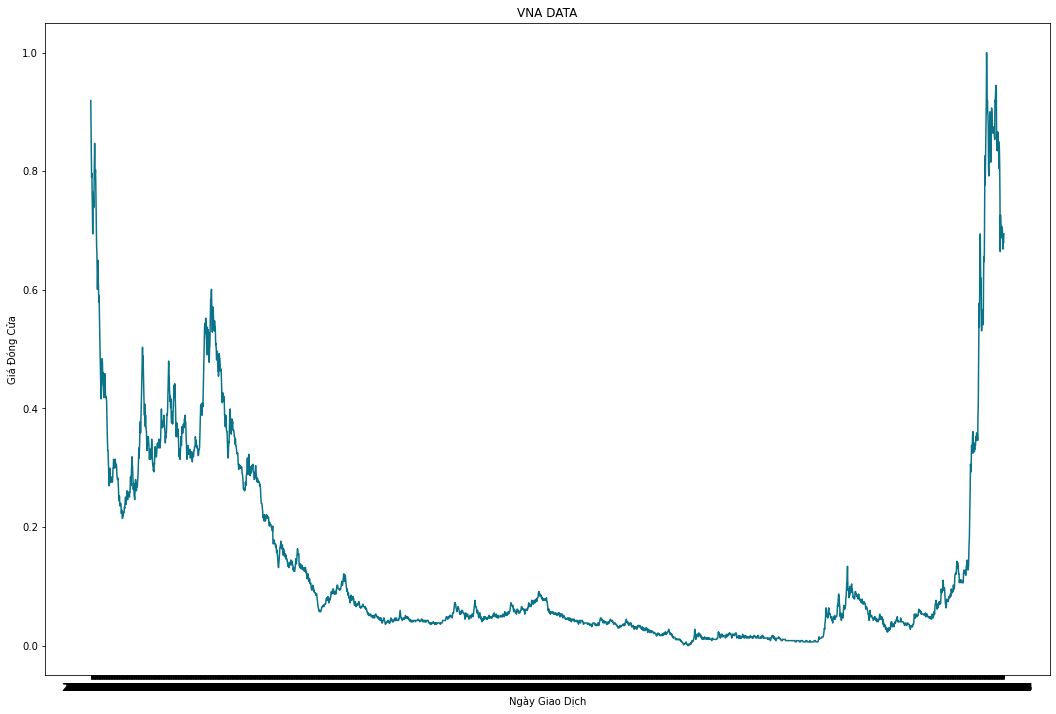

In [117]:
plot_basic(stocks)

# Check Point #2

Xử lí và tiền xử lí thành công. Lưu data vào ổ đĩa

## Load dữ liệu và chia dữ liệu thành 3 tập

**Bước 1:** Load dữ liệu đã được xử lí

In [118]:
import math
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

data_transform = pd.read_csv('VNA_transform.csv')

# Sử dụng ít dữ liệu hơn để thực hiện xác thực chéo
# data_transform = data_transform[:2500]
# data_transform = data_transform[:2000]
# data_transform = data_transform[:1500]
data_transform

,Ngày,Giá điều chỉnh,Giá đóng cửa,Giá bình quân,Giá tham chiếu,Giá mở cửa,Giá cao nhất,Giá thấp nhất,Change_Value,Change_Percent,KL,GT
0,2008-09-09,0.919321,0.919321,0.649045,0.976293,1.000000,1.000000,0.966140,0.167785,0.168586,0.157138,0.221345
1,2008-09-10,0.872611,0.872611,0.615924,0.658836,0.850932,0.837398,0.927765,0.868568,0.776711,0.129340,0.165496
2,2008-09-11,0.830149,0.830149,0.585775,0.625216,0.809524,0.794715,0.882619,0.843960,0.781510,0.017838,0.021732
3,2008-09-12,0.789809,0.789809,0.557113,0.594612,0.770186,0.756098,0.839729,0.817114,0.781830,0.001260,0.001461
4,2008-09-15,0.796178,0.796178,0.561571,0.565517,0.770186,0.792683,0.839729,0.909396,0.907070,0.245998,0.290916
...,...,...,...,...,...,...,...,...,...,...,...,...
3278,2021-12-03,0.677282,0.677282,0.677282,0.713362,0.681159,0.676829,0.720090,0.212528,0.181382,0.055884,0.056645
3279,2021-12-06,0.668790,0.668790,0.668790,0.698276,0.660455,0.664634,0.695260,0.229306,0.194658,0.088738,0.088779
3280,2021-12-07,0.681529,0.681529,0.681529,0.689655,0.648033,0.656504,0.706546,0.285235,0.243122,0.064710,0.064294
3281,2021-12-08,0.679406,0.679406,0.679406,0.685345,0.668737,0.658537,0.713318,0.290828,0.248081,0.049725,0.049698


**Bước 2:** Xác định các cột của inputs và target

In [119]:
input_cols = ['Ngày', 'Giá bình quân', 'Giá tham chiếu', 'Giá mở cửa', 'Giá cao nhất', 'Giá thấp nhất', 'KL', 'GT']
target = ['Giá đóng cửa']

In [120]:
inputs_df = stocks[input_cols]
target_df = stocks[target]

In [121]:
inputs_df

,Ngày,Giá bình quân,Giá tham chiếu,Giá mở cửa,Giá cao nhất,Giá thấp nhất,KL,GT
0,2008-09-09,0.649045,0.976293,1.000000,1.000000,0.966140,0.157138,0.221345
1,2008-09-10,0.615924,0.658836,0.850932,0.837398,0.927765,0.129340,0.165496
2,2008-09-11,0.585775,0.625216,0.809524,0.794715,0.882619,0.017838,0.021732
3,2008-09-12,0.557113,0.594612,0.770186,0.756098,0.839729,0.001260,0.001461
4,2008-09-15,0.561571,0.565517,0.770186,0.792683,0.839729,0.245998,0.290916
...,...,...,...,...,...,...,...,...
3278,2021-12-03,0.677282,0.713362,0.681159,0.676829,0.720090,0.055884,0.056645
3279,2021-12-06,0.668790,0.698276,0.660455,0.664634,0.695260,0.088738,0.088779
3280,2021-12-07,0.681529,0.689655,0.648033,0.656504,0.706546,0.064710,0.064294
3281,2021-12-08,0.679406,0.685345,0.668737,0.658537,0.713318,0.049725,0.049698


In [122]:
target_df

,Giá đóng cửa
0,0.919321
1,0.872611
2,0.830149
3,0.789809
4,0.796178
...,...
3278,0.677282
3279,0.668790
3280,0.681529
3281,0.679406


**Bước 3:** Chia bộ dữ liệu thành 3 phần theo TimeSeriesSplit

In [123]:
timesplit= TimeSeriesSplit(gap=0, max_train_size=None, n_splits=8, test_size=None)
for train_val_index, test_index in timesplit.split(data_transform):
        X_train_val, X_test = inputs_df[:len(train_val_index)], inputs_df[len(train_val_index): (len(train_val_index)+len(test_index))]
        Y_train_val, Y_test = target_df[:len(train_val_index)].values.ravel(), target_df[len(train_val_index): (len(train_val_index)+len(test_index))].values.ravel()

Đầu tin chia bộ dữ liệu thành 2 phần là `(Train+Val)` và `Test`

In [124]:
Y_train_val = pd.DataFrame(Y_train_val)

In [125]:
timesplit2 = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
for train_index, val_index in timesplit2.split(X_train_val):
        X_train, X_val = X_train_val[:len(train_index)], X_train_val[len(train_index): (len(train_index)+len(val_index))]
        Y_train, Y_val = Y_train_val[:len(train_index)].values.ravel(), Y_train_val[len(train_index): (len(train_index)+len(val_index))].values.ravel()

Sau đó tách bộ dữ liệu `(Train+Val)` thành `Train` và `Val`

In [126]:
print('Train: ',X_train.shape)
print('Val: ',X_val.shape)
print('Test: ',X_test.shape)

Train:  (2433, 8)
Val:  (486, 8)
Test:  (364, 8)


In [127]:
X_val

,Ngày,Giá bình quân,Giá tham chiếu,Giá mở cửa,Giá cao nhất,Giá thấp nhất,KL,GT
2433,2018-07-05,0.010616,0.012931,0.010352,0.010163,0.011287,0.002895,0.000106
2434,2018-07-06,0.012739,0.010776,0.008282,0.012195,0.009029,0.000609,0.000021
2435,2018-07-09,0.010616,0.008621,0.010352,0.010163,0.011287,0.000051,0.000002
2436,2018-07-10,0.010616,0.010776,0.010352,0.010163,0.011287,0.000000,0.000000
2437,2018-07-11,0.010616,0.010776,0.010352,0.010163,0.011287,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2914,2020-06-15,0.040340,0.040948,0.039337,0.040650,0.042889,0.059837,0.004785
2915,2020-06-16,0.040340,0.040948,0.039337,0.040650,0.040632,0.040125,0.003177
2916,2020-06-17,0.040340,0.040948,0.039337,0.038618,0.042889,0.014079,0.001121
2917,2020-06-18,0.040340,0.040948,0.039337,0.038618,0.040632,0.054245,0.004153


In [128]:
print('Train: ',Y_train.shape)
print('Val: ',Y_val.shape)
print('Test: ',Y_test.shape)

Train:  (2433,)
Val:  (486,)
Test:  (364,)


In [129]:
Y_train

array([0.91932059, 0.87261146, 0.83014862, ..., 0.01273885, 0.01273885,
       0.01273885])

Chia tập dữ liệu theo kịch bản đánh giá TimeSeriesSplit với tỉ lệ `train`:`val`:`test`=`7.5`:`1.5`:`1.0`

In [130]:
def plot_train_val_test(Xtrain, Xval, Xtest, Ytrain, Yval, Ytest, title='VNA DATA', y_label='Giá Đóng Cửa', x_label='Ngày Giao Dịch'):
    fig, ax = plt.subplots()
    ax.plot(Xtrain['Ngày'], Ytrain, '#325288')
    ax.plot(Xval['Ngày'], Yval, '#24A19C')
    ax.plot(Xtest['Ngày'], Ytest, '#D96098')
    
    ax.format_ydata = price
    ax.set_title(title)
    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    plt.show()

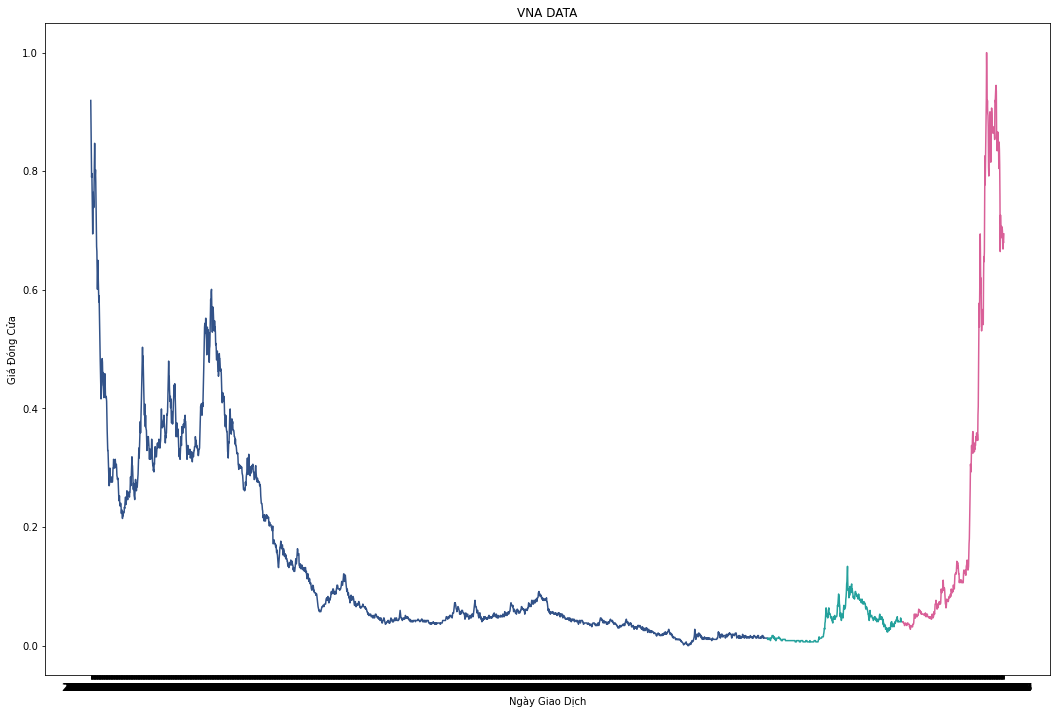

In [131]:
plot_train_val_test(X_train, X_val, X_test, Y_train, Y_val, Y_test)

# Check Point #3

Chia tập dữ liệu thành 3 phần để huấn luyện, đánh giá và kiểm thử

# Xây dựng các mô hình

## Mô hình Hồi quy tuyến tính

**Bước 1:** Xây dựng với mô hình đơn giản là Hồi quy tuyến tính

In [132]:
from sklearn import linear_model
linear = linear_model.LinearRegression()

Với mô hình Hồi quy tuyến tính, nhóm chúng em sẽ lấy target trong 1 ngày để làm target cho ngày hôm trước.

Vì vậy:
* Các tập X sẽ bị xóa đi dữ liệu ngày cuối cùng
* Các tập Y sẽ bị xóa đi ngày đầu tiên

In [133]:
input_train = X_train[X_train.columns[1:]].iloc[:-1]
input_val = X_val[X_val.columns[1:]].iloc[:-1]
input_test = X_test[X_test.columns[1:]].iloc[:-1]

Xóa cột `Ngày` và dữ liệu ngày cuối cùng

In [134]:
input_train

,Giá bình quân,Giá tham chiếu,Giá mở cửa,Giá cao nhất,Giá thấp nhất,KL,GT
0,0.649045,0.976293,1.000000,1.000000,0.966140,0.157138,2.213450e-01
1,0.615924,0.658836,0.850932,0.837398,0.927765,0.129340,1.654959e-01
2,0.585775,0.625216,0.809524,0.794715,0.882619,0.017838,2.173193e-02
3,0.557113,0.594612,0.770186,0.756098,0.839729,0.001260,1.461341e-03
4,0.561571,0.565517,0.770186,0.792683,0.839729,0.245998,2.909164e-01
...,...,...,...,...,...,...,...
2427,0.012739,0.012931,0.012422,0.012195,0.013544,0.001016,4.042351e-05
2428,0.012739,0.012931,0.012422,0.012195,0.013544,0.000005,2.176650e-07
2429,0.012739,0.012931,0.012422,0.012195,0.013544,0.002133,8.488937e-05
2430,0.012739,0.012931,0.012422,0.012195,0.013544,0.000000,0.000000e+00


In [135]:
target_train = Y_train[1:]
target_val = Y_val[1:]
target_test = Y_test[1:]

Xóa dữ liệu ngày đầu tiên của các tập Y

In [136]:
target_train.shape

(2432,)

**Bước 2:** Huấn luyện mô hình với tập Train

In [137]:
linear.fit(input_train, target_train)

LinearRegression()

In [138]:
linear.intercept_

-0.0007908284496517815

In [139]:
linear.coef_

array([ 0.51435894, -0.38310337, -0.17989476,  0.44172538,  0.61700372,
        0.00174859,  0.01381122])

**Bước 3:** Đánh giá trên tập Val

In [140]:
input_val

,Giá bình quân,Giá tham chiếu,Giá mở cửa,Giá cao nhất,Giá thấp nhất,KL,GT
2433,0.010616,0.012931,0.010352,0.010163,0.011287,0.002895,0.000106
2434,0.012739,0.010776,0.008282,0.012195,0.009029,0.000609,0.000021
2435,0.010616,0.008621,0.010352,0.010163,0.011287,0.000051,0.000002
2436,0.010616,0.010776,0.010352,0.010163,0.011287,0.000000,0.000000
2437,0.010616,0.010776,0.010352,0.010163,0.011287,0.000000,0.000000
...,...,...,...,...,...,...,...
2913,0.040340,0.049569,0.041408,0.042683,0.042889,0.090545,0.007291
2914,0.040340,0.040948,0.039337,0.040650,0.042889,0.059837,0.004785
2915,0.040340,0.040948,0.039337,0.040650,0.040632,0.040125,0.003177
2916,0.040340,0.040948,0.039337,0.038618,0.042889,0.014079,0.001121


In [141]:
target_val.shape

(485,)

Dùng mô hình Linear vừa được training để dự đoán trên tập Val

In [142]:
predict_val = linear.predict(input_val)

In [143]:
predict_val.shape

(485,)

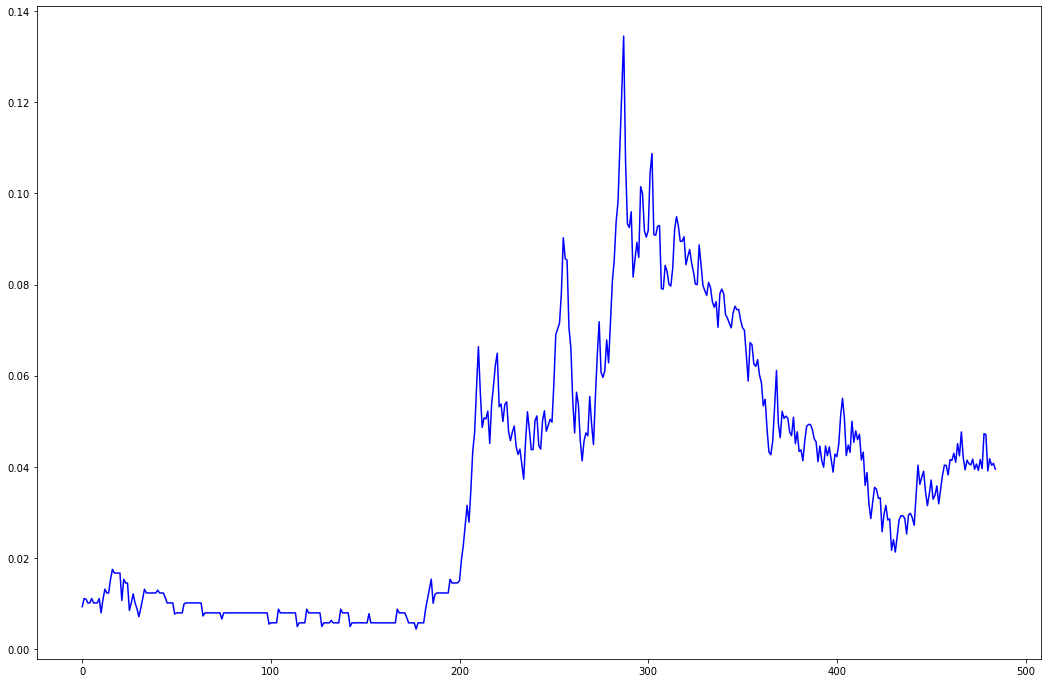

In [144]:
plt.plot(predict_val, '#0000FF', label='Dự đoán tren tập Val')

**Bước 5:** So sánh dự đoán của tập Val với thực tế

In [145]:
def plot_prediction(actual, prediction, title='VNA Giao dịch và Dự đoán', y_label='Gía đóng cửa', x_label='Ngày giao dịch'):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    # Plot actual and predicted close values
    plt.plot(actual, '#00FF00', label='Giao dịch thực tế')
    plt.plot(prediction, '#0000FF', label='Dự đoán')
    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')
    plt.show()

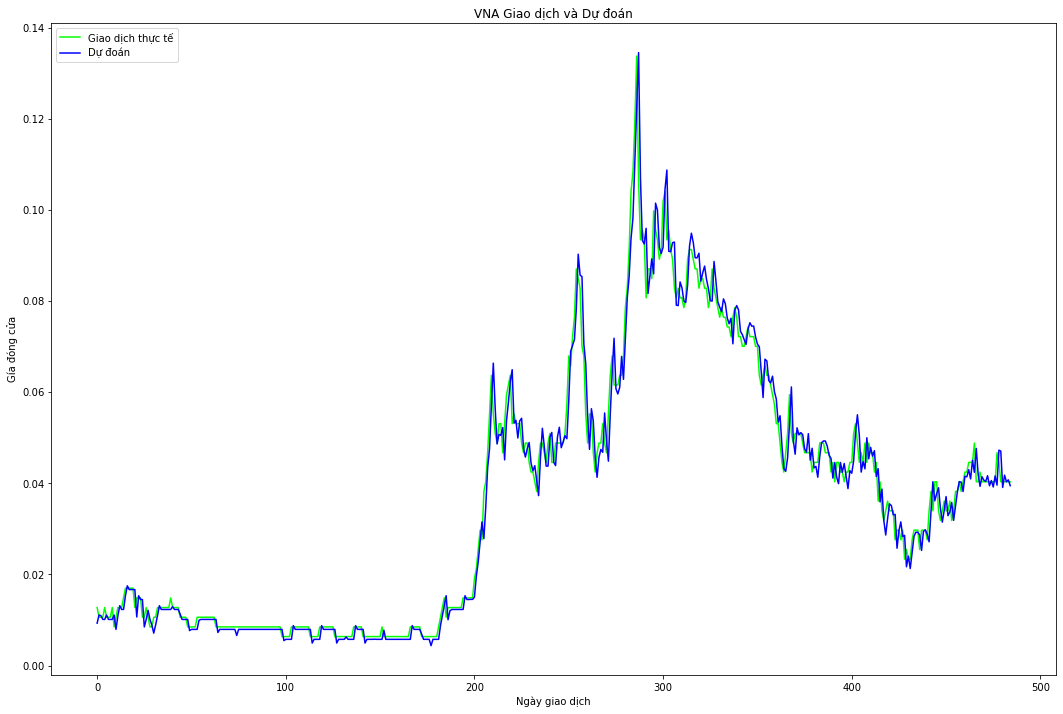

In [146]:
plot_prediction(target_val, predict_val)

**Bước 6:** Đánh giá mô hình Hồi quy tuyến tính vừa được training

In [147]:
predict_train = linear.predict(input_train)
trainScore = mean_squared_error(predict_train, target_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

valScore = mean_squared_error(predict_val, target_val)
print('Val Score: %.8f MSE (%.8f RMSE)' % (valScore, math.sqrt(valScore)))

predict_test = linear.predict(input_test)
testScore = mean_squared_error(predict_test, target_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.0001 MSE (0.0071 RMSE)
Val Score: 0.00001500 MSE (0.00387280 RMSE)
Test Score: 0.00048393 MSE (0.02199836 RMSE)


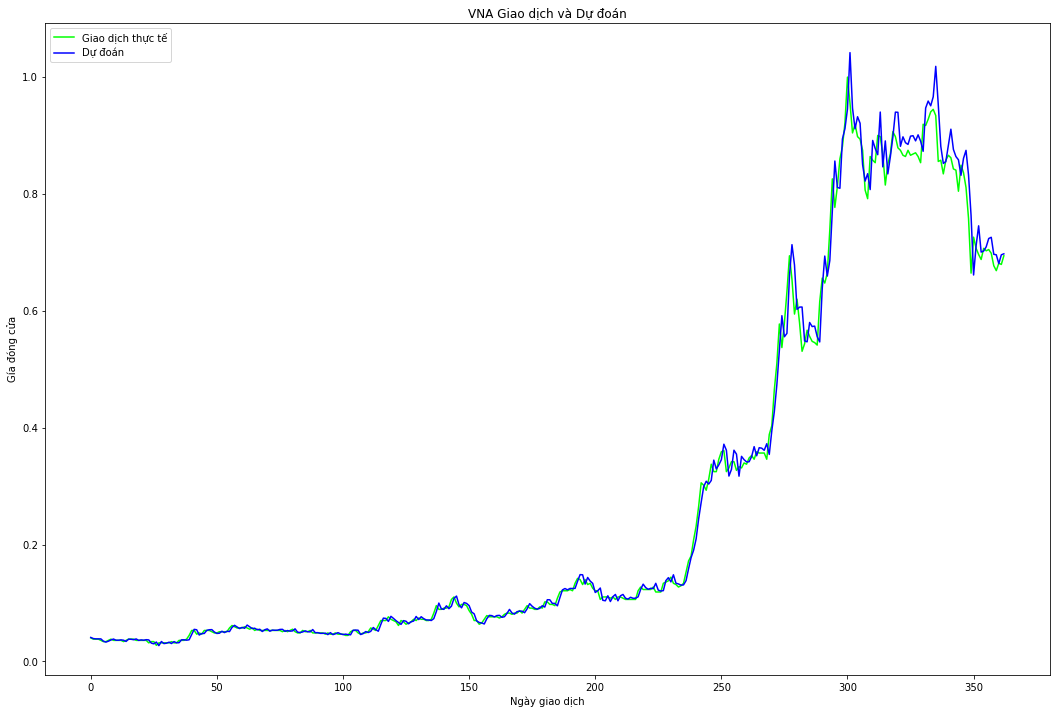

In [148]:
plot_prediction(target_test, predict_test)

# Check Point #4

Đã xây dựng, training và đánh giá bằng mô hình hồi quy tuyến tính

## Mô hình LSTM - Long short term memory

**Bước 1 :** Import thư viện cần thiết và load dữ liệu

In [149]:
import tensorflow as tf
from tensorflow import keras
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

In [150]:
input_train

,Giá bình quân,Giá tham chiếu,Giá mở cửa,Giá cao nhất,Giá thấp nhất,KL,GT
0,0.649045,0.976293,1.000000,1.000000,0.966140,0.157138,2.213450e-01
1,0.615924,0.658836,0.850932,0.837398,0.927765,0.129340,1.654959e-01
2,0.585775,0.625216,0.809524,0.794715,0.882619,0.017838,2.173193e-02
3,0.557113,0.594612,0.770186,0.756098,0.839729,0.001260,1.461341e-03
4,0.561571,0.565517,0.770186,0.792683,0.839729,0.245998,2.909164e-01
...,...,...,...,...,...,...,...
2427,0.012739,0.012931,0.012422,0.012195,0.013544,0.001016,4.042351e-05
2428,0.012739,0.012931,0.012422,0.012195,0.013544,0.000005,2.176650e-07
2429,0.012739,0.012931,0.012422,0.012195,0.013544,0.002133,8.488937e-05
2430,0.012739,0.012931,0.012422,0.012195,0.013544,0.000000,0.000000e+00


In [151]:
target_train.shape

(2432,)

**Bước 3:** Chỉnh lại shape của input và output trước khi đưa vào mô hình LSTM

In [152]:
# Convert to np.array
input_train_ar = np.array(input_train)
input_val_ar = np.array(input_val)
input_test_ar = np.array(input_test)

# Chọn time_step cho mô hình LSTM
time_steps = 1

In [153]:
input_train_ar.shape

(2432, 7)

In [154]:
# Thay đổi shape của tập X
input_train_lstm = input_train_ar.reshape(input_train_ar.shape[0], time_steps, input_train_ar.shape[1])
input_val_lstm = input_val_ar.reshape(input_val_ar.shape[0], time_steps, input_val_ar.shape[1])
input_test_lstm = input_test_ar.reshape(input_test_ar.shape[0], time_steps, input_test_ar.shape[1])

In [155]:
input_train_lstm.shape

(2432, 1, 7)

In [156]:
target_train.shape

(2432,)

**Bước 3:** Xây dựng mô hình LSTM đơn giản

In [157]:
# #Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(units=128, input_shape=(time_steps, input_train_ar.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))

In [158]:
# Compile the model
lstm.compile(loss='mean_squared_error', optimizer='adam')

In [159]:
lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               69632     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________


**Bước 4:** Huấn luyện mô hình

In [160]:
BS=32
epoch=100

In [161]:
history = lstm.fit(input_train_lstm,
                   target_train,
                   epochs=epoch,
                   batch_size=BS,
                   validation_data=(input_val_lstm, target_val),
                   verbose=1,
                   shuffle=False)

Epoch 1/100
76/76 [==============================] - 1s 3ms/step - loss: 0.0340 - val_loss: 7.0663e-04
Epoch 2/100
76/76 [==============================] - 0s 1ms/step - loss: 0.0145 - val_loss: 3.4632e-04
Epoch 3/100
76/76 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 5.2172e-05
Epoch 4/100
76/76 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 2.9542e-05
Epoch 5/100
76/76 [==============================] - 0s 1ms/step - loss: 2.1387e-04 - val_loss: 2.4399e-05
Epoch 6/100
76/76 [==============================] - 0s 1ms/step - loss: 1.5101e-04 - val_loss: 2.1791e-05
Epoch 7/100
76/76 [==============================] - 0s 1ms/step - loss: 1.3202e-04 - val_loss: 2.0526e-05
Epoch 8/100
76/76 [==============================] - 0s 1ms/step - loss: 1.1889e-04 - val_loss: 2.0396e-05
Epoch 9/100
76/76 [==============================] - 0s 1ms/step - loss: 1.0977e-04 - val_loss: 2.0949e-05
Epoch 10/100
76/76 [==============================] -

76/76 [==============================] - 0s 1ms/step - loss: 2.3284e-04 - val_loss: 5.3618e-05
Epoch 78/100
76/76 [==============================] - 0s 1ms/step - loss: 2.3205e-04 - val_loss: 5.3406e-05
Epoch 79/100
76/76 [==============================] - 0s 1ms/step - loss: 2.3146e-04 - val_loss: 5.2857e-05
Epoch 80/100
76/76 [==============================] - 0s 2ms/step - loss: 2.3127e-04 - val_loss: 5.3215e-05
Epoch 81/100
76/76 [==============================] - 0s 2ms/step - loss: 2.3145e-04 - val_loss: 5.9650e-05
Epoch 82/100
76/76 [==============================] - 0s 2ms/step - loss: 2.3693e-04 - val_loss: 5.7157e-05
Epoch 83/100
76/76 [==============================] - 0s 2ms/step - loss: 2.3492e-04 - val_loss: 5.5396e-05
Epoch 84/100
76/76 [==============================] - 0s 2ms/step - loss: 2.2892e-04 - val_loss: 5.5698e-05
Epoch 85/100
76/76 [==============================] - 0s 1ms/step - loss: 2.2720e-04 - val_loss: 5.3594e-05
Epoch 86/100
76/76 [=====================

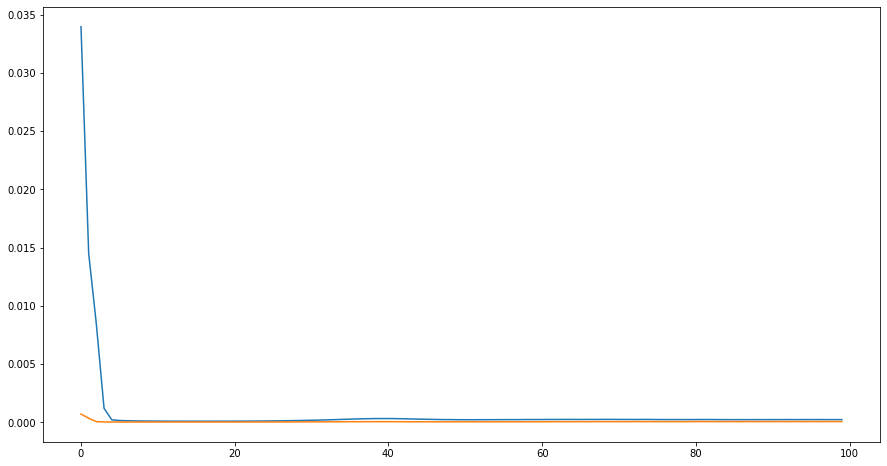

In [162]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

**Bước 5:** Đánh giá trên tập Val

In [163]:
predict_val_lstm1 = lstm.predict(input_val_lstm)

In [164]:
predict_val_lstm1.shape

(485, 1)

In [165]:
target_val.shape

(485,)

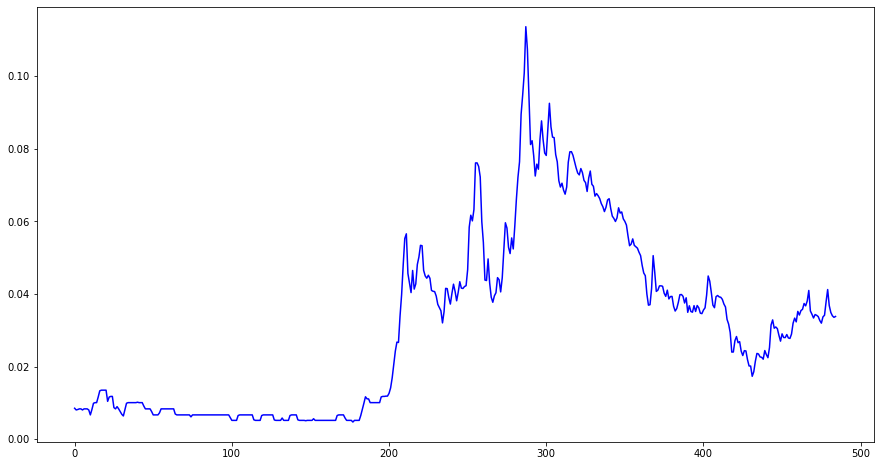

In [166]:
plt.plot(predict_val_lstm1, '#0000FF', label='Dự đoán trên tập Val')

**Bước 6:** So sánh kết quả dự đoán của Val và thực tế

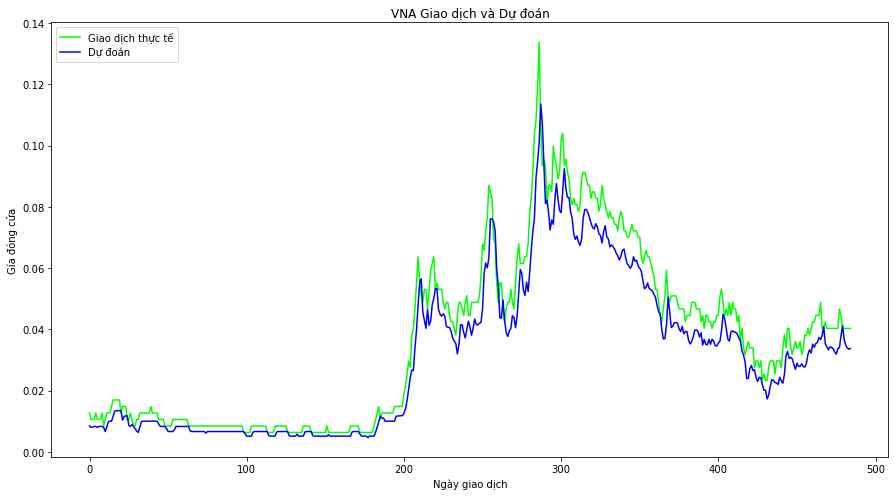

In [167]:
plot_prediction(target_val, predict_val_lstm1)

**Bước 7:** Đánh giá mô hình LSTM cơ bản vừa training

In [168]:
predict_train_lstm1 = lstm.predict(input_train_lstm)
train_Score_lstm1 = mean_squared_error(predict_train_lstm1.flatten(), target_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (train_Score_lstm1, math.sqrt(train_Score_lstm1)))

val_Score_lstm1 = mean_squared_error(predict_val_lstm1.flatten(), target_val)
print('Val Score: %.8f MSE (%.8f RMSE)' % (val_Score_lstm1, math.sqrt(val_Score_lstm1)))

predict_test_lstm1 = lstm.predict(input_test_lstm)
test_Score_lstm1 = mean_squared_error(predict_test_lstm1.flatten(), target_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (test_Score_lstm1, math.sqrt(test_Score_lstm1)))

Train Score: 0.0008 MSE (0.0278 RMSE)
Val Score: 0.00005898 MSE (0.00767966 RMSE)
Test Score: 0.00143836 MSE (0.03792572 RMSE)


In [169]:
print('%.8f'%test_Score_lstm1)

0.00143836


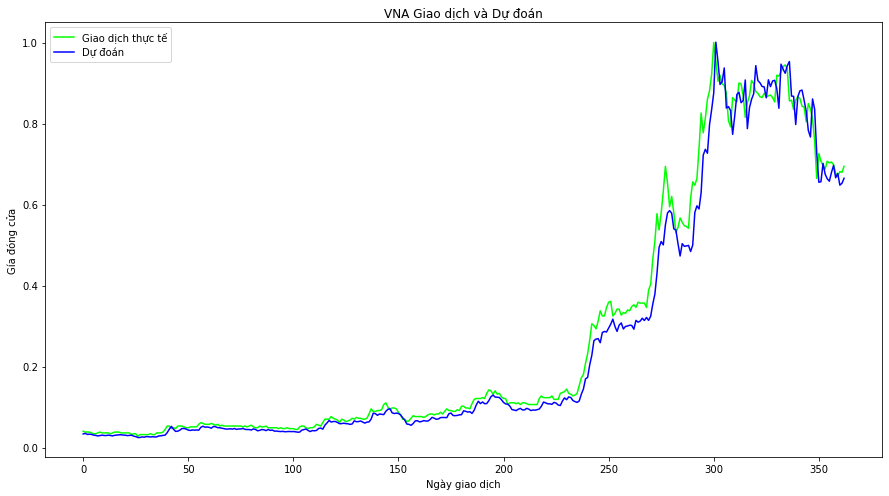

In [170]:
plot_prediction(target_test, predict_test_lstm1)

# Check Point #5

Đã xây dựng, training và đánh giá bằng mô hình LSTM cơ bản

## Thử lần lượt các tham số

In [80]:
time_steps=1

In [81]:
def check_param(un=32, bs=64, drop_out=0.1, time_step=1):
    # build model
    lstm_test = Sequential()
    lstm_test.add(LSTM(units=un, dropout=drop_out, input_shape=(time_steps, input_train_ar.shape[1]), activation='relu', return_sequences=False))
    lstm_test.add(Dense(1))
    
    # compile model
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    lstm_test.compile(loss='mean_squared_error', optimizer=opt)
    
    lstm_test.fit(input_train_lstm,
                   target_train,
                   epochs=100,
                   batch_size=bs,
                   validation_data=(input_val_lstm, target_val),
                   verbose=1,
                   shuffle=False)
    
    predict_val = lstm_test.predict(input_val_lstm)
    score_val = mean_squared_error(predict_val.flatten(), target_val)
    return ('%8f'%score_val)

#### units

In [224]:
units = [32, 64, 128, 256, 512]

In [225]:
sc_val = []
for i in units:
    sc_v=check_param(un=i)
    sc_val.append(sc_v)

Epoch 1/100
76/76 [==============================] - 1s 3ms/step - loss: 0.0271 - val_loss: 5.6201e-04
Epoch 2/100
76/76 [==============================] - 0s 1ms/step - loss: 0.0141 - val_loss: 5.6855e-04
Epoch 3/100
76/76 [==============================] - 0s 1ms/step - loss: 0.0089 - val_loss: 0.0010
Epoch 4/100
76/76 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 3.3228e-04
Epoch 5/100
76/76 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 8.8753e-05
Epoch 6/100
76/76 [==============================] - 0s 1ms/step - loss: 4.0560e-04 - val_loss: 3.9773e-05
Epoch 7/100
76/76 [==============================] - 0s 1ms/step - loss: 2.2119e-04 - val_loss: 3.1698e-05
Epoch 8/100
76/76 [==============================] - 0s 1ms/step - loss: 1.9079e-04 - val_loss: 2.7952e-05
Epoch 9/100
76/76 [==============================] - 0s 1ms/step - loss: 1.7076e-04 - val_loss: 2.5179e-05
Epoch 10/100
76/76 [==============================] - 0s 1ms/

76/76 [==============================] - 0s 1ms/step - loss: 2.6285e-04 - val_loss: 3.8130e-05
Epoch 54/100
76/76 [==============================] - 0s 1ms/step - loss: 2.4004e-04 - val_loss: 3.9783e-05
Epoch 55/100
76/76 [==============================] - 0s 1ms/step - loss: 2.2800e-04 - val_loss: 3.4207e-05
Epoch 56/100
76/76 [==============================] - 0s 1ms/step - loss: 2.1143e-04 - val_loss: 3.7300e-05
Epoch 57/100
76/76 [==============================] - 0s 1ms/step - loss: 2.0937e-04 - val_loss: 3.2622e-05
Epoch 58/100
76/76 [==============================] - 0s 1ms/step - loss: 2.0503e-04 - val_loss: 3.6866e-05
Epoch 59/100
76/76 [==============================] - 0s 1ms/step - loss: 2.0905e-04 - val_loss: 3.3014e-05
Epoch 60/100
76/76 [==============================] - 0s 1ms/step - loss: 2.0768e-04 - val_loss: 3.7397e-05
Epoch 61/100
76/76 [==============================] - 0s 1ms/step - loss: 2.1299e-04 - val_loss: 3.4586e-05
Epoch 62/100
76/76 [=====================

76/76 [==============================] - 0s 4ms/step - loss: 1.5793e-04 - val_loss: 2.5901e-05
Epoch 6/100
76/76 [==============================] - 0s 4ms/step - loss: 1.3533e-04 - val_loss: 2.1479e-05
Epoch 7/100
76/76 [==============================] - 0s 4ms/step - loss: 1.1961e-04 - val_loss: 1.9592e-05
Epoch 8/100
76/76 [==============================] - 0s 4ms/step - loss: 1.1051e-04 - val_loss: 1.9486e-05
Epoch 9/100
76/76 [==============================] - 0s 4ms/step - loss: 1.0569e-04 - val_loss: 2.0379e-05
Epoch 10/100
76/76 [==============================] - 0s 4ms/step - loss: 1.0326e-04 - val_loss: 2.1645e-05
Epoch 11/100
76/76 [==============================] - 0s 5ms/step - loss: 1.0249e-04 - val_loss: 2.3032e-05
Epoch 12/100
76/76 [==============================] - 0s 4ms/step - loss: 1.0361e-04 - val_loss: 2.4395e-05
Epoch 13/100
76/76 [==============================] - 0s 4ms/step - loss: 1.0708e-04 - val_loss: 2.5835e-05
Epoch 14/100
76/76 [=========================

76/76 [==============================] - 0s 4ms/step - loss: 2.5323e-04 - val_loss: 5.3982e-05
Epoch 82/100
76/76 [==============================] - 0s 4ms/step - loss: 2.7781e-04 - val_loss: 6.0871e-05
Epoch 83/100
76/76 [==============================] - 0s 4ms/step - loss: 3.0758e-04 - val_loss: 6.5222e-05
Epoch 84/100
76/76 [==============================] - 0s 4ms/step - loss: 3.4816e-04 - val_loss: 7.6114e-05
Epoch 85/100
76/76 [==============================] - 0s 4ms/step - loss: 3.9902e-04 - val_loss: 8.4700e-05
Epoch 86/100
76/76 [==============================] - 0s 4ms/step - loss: 4.6543e-04 - val_loss: 1.0116e-04
Epoch 87/100
76/76 [==============================] - 0s 4ms/step - loss: 5.3776e-04 - val_loss: 1.1999e-04
Epoch 88/100
76/76 [==============================] - 0s 4ms/step - loss: 6.0150e-04 - val_loss: 1.4111e-04
Epoch 89/100
76/76 [==============================] - 0s 4ms/step - loss: 6.3178e-04 - val_loss: 1.4957e-04
Epoch 90/100
76/76 [=====================

In [226]:
sc_val

['0.000042', '0.000048', '0.000042', '0.000066', '0.000043']

In [228]:
dt = {'Units': units, 'Score Val': sc_val}
df = pd.DataFrame(dt)
df

,Units,Score Val
0,32,0.000042
1,64,0.000048
2,128,0.000042
3,256,0.000066
4,512,0.000043


Chọn units = 32

#### batch_size

In [231]:
batch_size = [16, 32, 64, 128, 256]

In [232]:
sc_val_bs = []
for i in batch_size:
    sc_v_bs=check_param(bs=i)
    sc_val_bs.append(sc_v_bs)

Epoch 1/100
152/152 [==============================] - 1s 5ms/step - loss: 0.0281 - val_loss: 0.0012
Epoch 2/100
152/152 [==============================] - 0s 1ms/step - loss: 0.0144 - val_loss: 3.6278e-04
Epoch 3/100
152/152 [==============================] - 0s 1ms/step - loss: 0.0044 - val_loss: 6.9379e-05
Epoch 4/100
152/152 [==============================] - 0s 1ms/step - loss: 9.5535e-04 - val_loss: 3.6449e-05
Epoch 5/100
152/152 [==============================] - 0s 1ms/step - loss: 3.7925e-04 - val_loss: 3.0289e-05
Epoch 6/100
152/152 [==============================] - 0s 1ms/step - loss: 2.6936e-04 - val_loss: 3.4174e-05
Epoch 7/100
152/152 [==============================] - 0s 1ms/step - loss: 2.3480e-04 - val_loss: 4.0895e-05
Epoch 8/100
152/152 [==============================] - 0s 1ms/step - loss: 2.0767e-04 - val_loss: 4.9201e-05
Epoch 9/100
152/152 [==============================] - 0s 1ms/step - loss: 1.8423e-04 - val_loss: 5.4110e-05
Epoch 10/100
152/152 [=============

76/76 [==============================] - 0s 1ms/step - loss: 2.4468e-04 - val_loss: 3.8725e-05
Epoch 51/100
76/76 [==============================] - 0s 1ms/step - loss: 2.3696e-04 - val_loss: 3.7784e-05
Epoch 52/100
76/76 [==============================] - 0s 1ms/step - loss: 2.2857e-04 - val_loss: 3.6892e-05
Epoch 53/100
76/76 [==============================] - 0s 1ms/step - loss: 2.2012e-04 - val_loss: 3.6082e-05
Epoch 54/100
76/76 [==============================] - 0s 1ms/step - loss: 2.1374e-04 - val_loss: 3.5468e-05
Epoch 55/100
76/76 [==============================] - 0s 1ms/step - loss: 2.1028e-04 - val_loss: 3.5215e-05
Epoch 56/100
76/76 [==============================] - 0s 1ms/step - loss: 2.0919e-04 - val_loss: 3.5211e-05
Epoch 57/100
76/76 [==============================] - 0s 1ms/step - loss: 2.0908e-04 - val_loss: 3.5292e-05
Epoch 58/100
76/76 [==============================] - 0s 1ms/step - loss: 2.0945e-04 - val_loss: 3.5359e-05
Epoch 59/100
76/76 [=====================

19/19 [==============================] - 0s 2ms/step - loss: 0.0332 - val_loss: 5.7747e-04
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0265 - val_loss: 0.0011
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0211 - val_loss: 0.0020
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0169 - val_loss: 0.0029
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0134 - val_loss: 0.0032
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0106 - val_loss: 0.0034
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0030
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0022
Epoch 10/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0015
Epoch 11/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 6.4041e-04
Epoch 12/100

Epoch 79/100
19/19 [==============================] - 0s 2ms/step - loss: 7.4029e-05 - val_loss: 1.7784e-05
Epoch 80/100
19/19 [==============================] - 0s 2ms/step - loss: 7.3874e-05 - val_loss: 1.7827e-05
Epoch 81/100
19/19 [==============================] - 0s 2ms/step - loss: 7.3566e-05 - val_loss: 1.7768e-05
Epoch 82/100
19/19 [==============================] - 0s 3ms/step - loss: 7.3188e-05 - val_loss: 1.7685e-05
Epoch 83/100
19/19 [==============================] - 0s 2ms/step - loss: 7.3097e-05 - val_loss: 1.7758e-05
Epoch 84/100
19/19 [==============================] - 0s 2ms/step - loss: 7.2681e-05 - val_loss: 1.7651e-05
Epoch 85/100
19/19 [==============================] - 0s 2ms/step - loss: 7.2418e-05 - val_loss: 1.7632e-05
Epoch 86/100
19/19 [==============================] - 0s 2ms/step - loss: 7.2238e-05 - val_loss: 1.7655e-05
Epoch 87/100
19/19 [==============================] - 0s 2ms/step - loss: 7.1881e-05 - val_loss: 1.7586e-05
Epoch 88/100
19/19 [========

10/10 [==============================] - 0s 4ms/step - loss: 8.8290e-05 - val_loss: 2.7578e-05
Epoch 57/100
10/10 [==============================] - 0s 4ms/step - loss: 8.7802e-05 - val_loss: 2.7175e-05
Epoch 58/100
10/10 [==============================] - 0s 4ms/step - loss: 8.7322e-05 - val_loss: 2.7073e-05
Epoch 59/100
10/10 [==============================] - 0s 4ms/step - loss: 8.6887e-05 - val_loss: 2.6412e-05
Epoch 60/100
10/10 [==============================] - 0s 4ms/step - loss: 8.6403e-05 - val_loss: 2.6448e-05
Epoch 61/100
10/10 [==============================] - 0s 4ms/step - loss: 8.6009e-05 - val_loss: 2.5731e-05
Epoch 62/100
10/10 [==============================] - 0s 4ms/step - loss: 8.5546e-05 - val_loss: 2.5768e-05
Epoch 63/100
10/10 [==============================] - 0s 3ms/step - loss: 8.5201e-05 - val_loss: 2.4999e-05
Epoch 64/100
10/10 [==============================] - 0s 4ms/step - loss: 8.4756e-05 - val_loss: 2.5128e-05
Epoch 65/100
10/10 [=====================

In [233]:
sc_val_bs

['0.000019', '0.000043', '0.000017', '0.000017', '0.000020']

In [234]:
dt = {'Batch Size': batch_size, 'Score Val BS': sc_val_bs}
df = pd.DataFrame(dt)
df

,Batch Size,Score Val BS
0,16,0.000019
1,32,0.000043
2,64,0.000017
3,128,0.000017
4,256,0.000020


Chọn batch_size = 64

#### drop_out

In [243]:
drop_out = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

In [244]:
sc_val_dr = []
for i in drop_out:
    sc_v_dr=check_param(drop_out=i)
    sc_val_dr.append(sc_v_dr)

Epoch 1/100
38/38 [==============================] - 1s 6ms/step - loss: 0.0340 - val_loss: 6.0126e-04
Epoch 2/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0238 - val_loss: 0.0019
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0165 - val_loss: 0.0035
Epoch 4/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0117 - val_loss: 0.0035
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0031
Epoch 6/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0056 - val_loss: 0.0023
Epoch 7/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0037 - val_loss: 0.0014
Epoch 8/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 7.3206e-04
Epoch 9/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 2.7895e-04
Epoch 10/100
38/38 [==============================] - 0s 1ms/step - loss: 7.3546e-04 - val_loss: 

38/38 [==============================] - 0s 1ms/step - loss: 2.8931e-04 - val_loss: 2.3966e-05
Epoch 55/100
38/38 [==============================] - 0s 1ms/step - loss: 2.3428e-04 - val_loss: 2.8943e-05
Epoch 56/100
38/38 [==============================] - 0s 1ms/step - loss: 3.0836e-04 - val_loss: 2.5190e-05
Epoch 57/100
38/38 [==============================] - 0s 1ms/step - loss: 3.1194e-04 - val_loss: 2.9376e-05
Epoch 58/100
38/38 [==============================] - 0s 1ms/step - loss: 2.9648e-04 - val_loss: 2.6605e-05
Epoch 59/100
38/38 [==============================] - 0s 1ms/step - loss: 2.7607e-04 - val_loss: 2.6815e-05
Epoch 60/100
38/38 [==============================] - 0s 1ms/step - loss: 2.8984e-04 - val_loss: 2.9081e-05
Epoch 61/100
38/38 [==============================] - 0s 1ms/step - loss: 2.5963e-04 - val_loss: 2.6873e-05
Epoch 62/100
38/38 [==============================] - 0s 1ms/step - loss: 2.2793e-04 - val_loss: 3.2652e-05
Epoch 63/100
38/38 [=====================

38/38 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0020
Epoch 8/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 0.0013
Epoch 9/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 8.4880e-04
Epoch 10/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 5.2814e-04
Epoch 11/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 3.4171e-04
Epoch 12/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 2.3079e-04
Epoch 13/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 1.8127e-04
Epoch 14/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 1.4226e-04
Epoch 15/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 1.1891e-04
Epoch 16/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0017 - val_

Epoch 84/100
38/38 [==============================] - 0s 1ms/step - loss: 2.4499e-04 - val_loss: 1.2562e-04
Epoch 85/100
38/38 [==============================] - 0s 1ms/step - loss: 5.0408e-04 - val_loss: 1.5668e-04
Epoch 86/100
38/38 [==============================] - 0s 1ms/step - loss: 2.5644e-04 - val_loss: 1.5498e-04
Epoch 87/100
38/38 [==============================] - 0s 1ms/step - loss: 4.1389e-04 - val_loss: 1.6059e-04
Epoch 88/100
38/38 [==============================] - 0s 1ms/step - loss: 3.9428e-04 - val_loss: 1.5523e-04
Epoch 89/100
38/38 [==============================] - 0s 1ms/step - loss: 3.5877e-04 - val_loss: 1.7174e-04
Epoch 90/100
38/38 [==============================] - 0s 1ms/step - loss: 3.9554e-04 - val_loss: 1.7108e-04
Epoch 91/100
38/38 [==============================] - 0s 1ms/step - loss: 5.6057e-04 - val_loss: 1.9008e-04
Epoch 92/100
38/38 [==============================] - 0s 1ms/step - loss: 2.2581e-04 - val_loss: 1.3484e-04
Epoch 93/100
38/38 [========

38/38 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 8.1240e-05
Epoch 39/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 7.8996e-05
Epoch 40/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 8.4391e-05
Epoch 41/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 8.9900e-05
Epoch 42/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 8.7746e-05
Epoch 43/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 8.2352e-05
Epoch 44/100
38/38 [==============================] - 0s 1ms/step - loss: 9.2868e-04 - val_loss: 9.7475e-05
Epoch 45/100
38/38 [==============================] - 0s 1ms/step - loss: 7.7087e-04 - val_loss: 9.7924e-05
Epoch 46/100
38/38 [==============================] - 0s 1ms/step - loss: 8.0897e-04 - val_loss: 9.7765e-05
Epoch 47/100
38/38 [==============================] - 0s 1ms/step

38/38 [==============================] - 0s 1ms/step - loss: 0.0036 - val_loss: 1.2754e-04
Epoch 16/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 9.8823e-05
Epoch 17/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss: 1.1430e-04
Epoch 18/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 7.7239e-05
Epoch 19/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 8.4655e-05
Epoch 20/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 6.0348e-05
Epoch 21/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 6.3401e-05
Epoch 22/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 4.3502e-05
Epoch 23/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 4.5479e-05
Epoch 24/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0

Epoch 92/100
38/38 [==============================] - 0s 1ms/step - loss: 4.4885e-04 - val_loss: 1.5014e-04
Epoch 93/100
38/38 [==============================] - 0s 1ms/step - loss: 4.4126e-04 - val_loss: 1.3555e-04
Epoch 94/100
38/38 [==============================] - 0s 1ms/step - loss: 4.0158e-04 - val_loss: 1.5221e-04
Epoch 95/100
38/38 [==============================] - 0s 1ms/step - loss: 4.3226e-04 - val_loss: 1.5591e-04
Epoch 96/100
38/38 [==============================] - 0s 1ms/step - loss: 5.6974e-04 - val_loss: 1.5791e-04
Epoch 97/100
38/38 [==============================] - 0s 1ms/step - loss: 4.4496e-04 - val_loss: 1.5377e-04
Epoch 98/100
38/38 [==============================] - 0s 1ms/step - loss: 5.2687e-04 - val_loss: 1.6384e-04
Epoch 99/100
38/38 [==============================] - 0s 1ms/step - loss: 4.7985e-04 - val_loss: 1.2677e-04
Epoch 100/100
38/38 [==============================] - 0s 1ms/step - loss: 5.2957e-04 - val_loss: 1.5549e-04
Epoch 1/100
38/38 [========

38/38 [==============================] - 0s 1ms/step - loss: 9.6617e-04 - val_loss: 2.0461e-04
Epoch 49/100
38/38 [==============================] - 0s 1ms/step - loss: 9.9769e-04 - val_loss: 1.9616e-04
Epoch 50/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 2.1307e-04
Epoch 51/100
38/38 [==============================] - 0s 1ms/step - loss: 9.9471e-04 - val_loss: 2.0535e-04
Epoch 52/100
38/38 [==============================] - 0s 1ms/step - loss: 8.5161e-04 - val_loss: 2.0499e-04
Epoch 53/100
38/38 [==============================] - 0s 1ms/step - loss: 8.0048e-04 - val_loss: 1.8193e-04
Epoch 54/100
38/38 [==============================] - 0s 2ms/step - loss: 7.8154e-04 - val_loss: 1.9171e-04
Epoch 55/100
38/38 [==============================] - 0s 1ms/step - loss: 8.0242e-04 - val_loss: 1.9634e-04
Epoch 56/100
38/38 [==============================] - 0s 1ms/step - loss: 7.6502e-04 - val_loss: 2.1086e-04
Epoch 57/100
38/38 [=========================

Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0128 - val_loss: 0.0032
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.0028
Epoch 6/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0085 - val_loss: 0.0022
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0017
Epoch 8/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0012
Epoch 9/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0010
Epoch 10/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0056 - val_loss: 9.2294e-04
Epoch 11/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0051 - val_loss: 7.2048e-04
Epoch 12/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0052 - val_loss: 7.2003e-04
Epoch 13/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0049 - val_loss: 6

Epoch 84/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 85/100
38/38 [==============================] - 0s 1ms/step - loss: 9.0049e-04 - val_loss: 0.0011
Epoch 86/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 87/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 88/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 89/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 90/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 91/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 92/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 93/100
38/38 [==============================] - 0s 1ms/step - loss: 9.5586e-04 - val_loss:

Epoch 45/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0047 - val_loss: 9.7734e-04
Epoch 46/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 9.7771e-04
Epoch 47/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0040 - val_loss: 0.0010
Epoch 48/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0038 - val_loss: 0.0010
Epoch 49/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0036 - val_loss: 0.0010
Epoch 50/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 0.0010
Epoch 51/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0010
Epoch 52/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0038 - val_loss: 0.0011
Epoch 53/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss: 0.0011
Epoch 54/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0036 - val_loss:

Epoch 27/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0057 - val_loss: 0.0011
Epoch 28/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0071 - val_loss: 0.0012
Epoch 29/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0013
Epoch 30/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0013
Epoch 31/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0054 - val_loss: 0.0013
Epoch 32/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0064 - val_loss: 0.0013
Epoch 33/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0054 - val_loss: 0.0013
Epoch 34/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0014
Epoch 35/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0055 - val_loss: 0.0014
Epoch 36/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0056 - val_loss: 0.0014


Epoch 9/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0110 - val_loss: 0.0016
Epoch 10/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0103 - val_loss: 0.0015
Epoch 11/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0092 - val_loss: 0.0014
Epoch 12/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0014
Epoch 13/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0012
Epoch 14/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.0013
Epoch 15/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0013
Epoch 16/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 0.0013
Epoch 17/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0093 - val_loss: 0.0013
Epoch 18/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0086 - val_loss: 0.0013
E

Epoch 91/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 92/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 93/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 94/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0037 - val_loss: 0.0026
Epoch 95/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 96/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 97/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 98/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 99/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 100/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0025

Epoch 73/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0052 - val_loss: 0.0027
Epoch 74/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0050 - val_loss: 0.0028
Epoch 75/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0051 - val_loss: 0.0026
Epoch 76/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0043 - val_loss: 0.0027
Epoch 77/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0051 - val_loss: 0.0026
Epoch 78/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0045 - val_loss: 0.0026
Epoch 79/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0051 - val_loss: 0.0027
Epoch 80/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0051 - val_loss: 0.0027
Epoch 81/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0053 - val_loss: 0.0028
Epoch 82/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0055 - val_loss: 0.0027


Epoch 55/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0076 - val_loss: 0.0034
Epoch 56/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0066 - val_loss: 0.0034
Epoch 57/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0070 - val_loss: 0.0035
Epoch 58/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0060 - val_loss: 0.0034
Epoch 59/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0062 - val_loss: 0.0034
Epoch 60/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0062 - val_loss: 0.0033
Epoch 61/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0065 - val_loss: 0.0033
Epoch 62/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0065 - val_loss: 0.0033
Epoch 63/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0032
Epoch 64/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0032


Epoch 37/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0116 - val_loss: 0.0032
Epoch 38/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0117 - val_loss: 0.0033
Epoch 39/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0110 - val_loss: 0.0033
Epoch 40/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0114 - val_loss: 0.0033
Epoch 41/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0116 - val_loss: 0.0034
Epoch 42/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0034
Epoch 43/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0034
Epoch 44/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0115 - val_loss: 0.0034
Epoch 45/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0119 - val_loss: 0.0035
Epoch 46/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0110 - val_loss: 0.0035


Epoch 19/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0189 - val_loss: 0.0048
Epoch 20/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0196 - val_loss: 0.0051
Epoch 21/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0186 - val_loss: 0.0050
Epoch 22/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0185 - val_loss: 0.0049
Epoch 23/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0177 - val_loss: 0.0047
Epoch 24/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0184 - val_loss: 0.0048
Epoch 25/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0174 - val_loss: 0.0046
Epoch 26/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0188 - val_loss: 0.0048
Epoch 27/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0180 - val_loss: 0.0045
Epoch 28/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0176 - val_loss: 0.0046


In [245]:
sc_val_dr

['0.000038',
 '0.000050',
 '0.000022',
 '0.000164',
 '0.000082',
 '0.000247',
 '0.000155',
 '0.000086',
 '0.000101',
 '0.000847',
 '0.001190',
 '0.001483',
 '0.001539',
 '0.001919',
 '0.002516',
 '0.002705',
 '0.002392',
 '0.003157',
 '0.004300']

In [246]:
dt = {'Drop Out': drop_out, 'Score Val DR': sc_val_dr}
df = pd.DataFrame(dt)
df

,Drop Out,Score Val DR
0,0.05,0.000038
1,0.10,0.000050
2,0.15,0.000022
3,0.20,0.000164
4,0.25,0.000082
5,0.30,0.000247
6,0.35,0.000155
7,0.40,0.000086
8,0.45,0.000101
9,0.50,0.000847


Chọn drop_out=0.15

## Improved LSTM Model

**Bước 1:** Xây dựng improved LSTM model

In [171]:
# Set up hyperparameters
batch_size = 64
epochs = 100

In [172]:
lstm2 = Sequential()
lstm2.add(LSTM(units=32, dropout=0.15, input_shape=(time_steps, input_train_ar.shape[1]), activation='relu', return_sequences=False))
lstm2.add(Dense(1))

In [173]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
lstm2.compile(loss='mean_squared_error', optimizer=opt)

In [174]:
lstm2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 32)                5120      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


**Bước 2:** Train improved LSTM model

In [175]:
history2 = lstm2.fit(input_train_lstm,
                     target_train,
                     epochs=epochs,
                     batch_size=batch_size,
                     validation_data=(input_val_lstm, target_val),
                     verbose=1,
                     shuffle=False)

Epoch 1/100
38/38 [==============================] - 1s 5ms/step - loss: 0.0329 - val_loss: 6.1635e-04
Epoch 2/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0215 - val_loss: 0.0021
Epoch 3/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0141 - val_loss: 0.0033
Epoch 4/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0029
Epoch 5/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0025
Epoch 6/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0047 - val_loss: 0.0017
Epoch 7/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 9.9019e-04
Epoch 8/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 5.3701e-04
Epoch 9/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 3.1347e-04
Epoch 10/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 

Epoch 78/100
38/38 [==============================] - 0s 1ms/step - loss: 2.0543e-04 - val_loss: 1.0257e-04
Epoch 79/100
38/38 [==============================] - 0s 1ms/step - loss: 1.9478e-04 - val_loss: 9.6825e-05
Epoch 80/100
38/38 [==============================] - 0s 1ms/step - loss: 1.6138e-04 - val_loss: 9.2513e-05
Epoch 81/100
38/38 [==============================] - 0s 1ms/step - loss: 1.7905e-04 - val_loss: 1.1105e-04
Epoch 82/100
38/38 [==============================] - 0s 1ms/step - loss: 1.5047e-04 - val_loss: 1.1404e-04
Epoch 83/100
38/38 [==============================] - 0s 1ms/step - loss: 1.5906e-04 - val_loss: 1.1217e-04
Epoch 84/100
38/38 [==============================] - 0s 1ms/step - loss: 1.5576e-04 - val_loss: 1.1262e-04
Epoch 85/100
38/38 [==============================] - 0s 1ms/step - loss: 1.3410e-04 - val_loss: 9.1700e-05
Epoch 86/100
38/38 [==============================] - 0s 1ms/step - loss: 1.6342e-04 - val_loss: 9.7386e-05
Epoch 87/100
38/38 [========

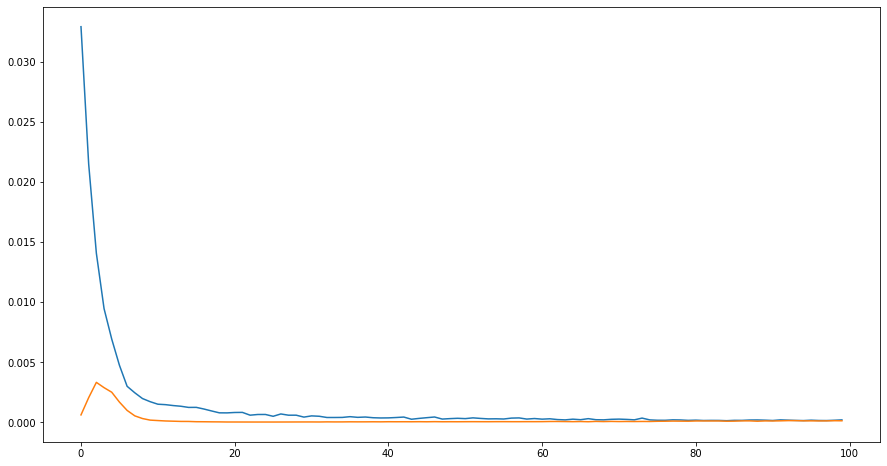

In [176]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

**Step 3:** Make prediction on improved LSTM model

In [177]:
predict_val_lstm2 = lstm2.predict(input_val_lstm)

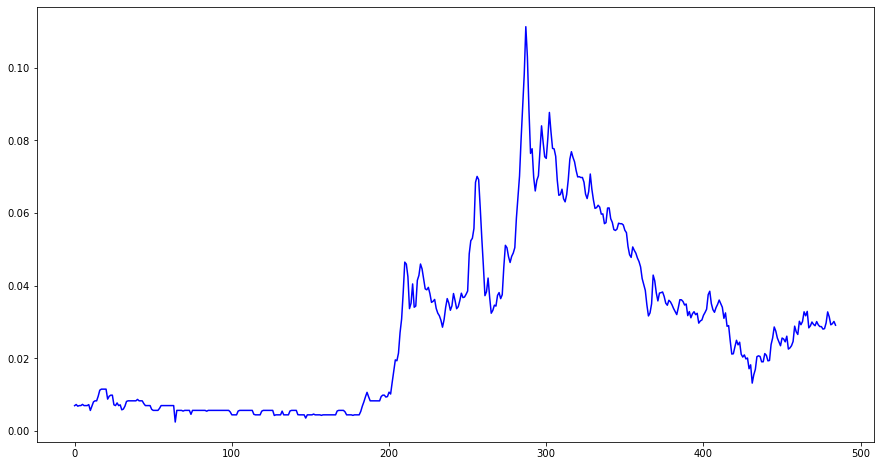

In [178]:
plt.plot(predict_val_lstm2, '#0000FF', label='Dự đoán trên tập Val')

**Step 4:** plot the results

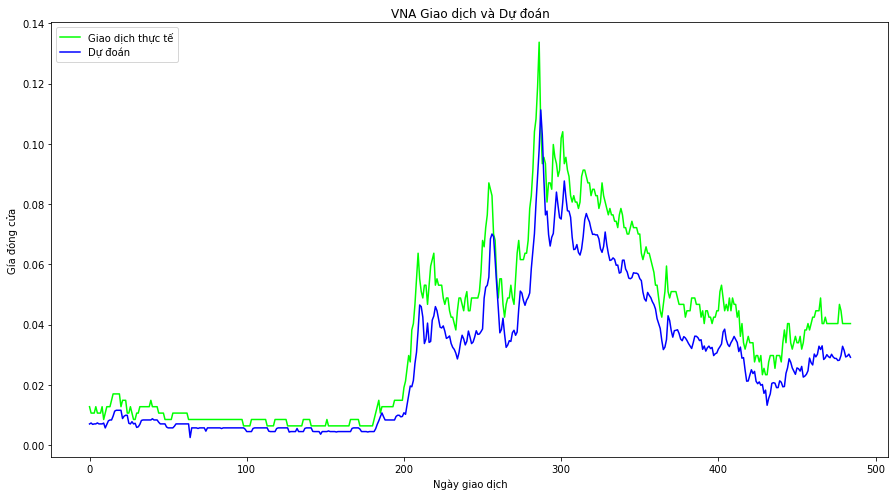

In [179]:
plot_prediction(target_val, predict_val_lstm2)

**Step 5:** Get the test score

In [180]:
print('LSTM IMPROVED')
predict_train_lstm2 = lstm2.predict(input_train_lstm)
train_Score_lstm2 = mean_squared_error(predict_train_lstm2.flatten(), target_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (train_Score_lstm2, math.sqrt(train_Score_lstm2)))

val_Score_lstm2 = mean_squared_error(predict_val_lstm2.flatten(), target_val)
print('Val Score: %.8f MSE (%.8f RMSE)' % (val_Score_lstm2, math.sqrt(val_Score_lstm2)))

predict_test_lstm2 = lstm2.predict(input_test_lstm)
test_Score_lstm2 = mean_squared_error(predict_test_lstm2.flatten(), target_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (test_Score_lstm2, math.sqrt(test_Score_lstm2)))

LSTM IMPROVED
Train Score: 0.0009 MSE (0.0302 RMSE)
Val Score: 0.00012574 MSE (0.01121333 RMSE)
Test Score: 0.00139761 MSE (0.03738466 RMSE)


LSTM BASIC
* Train Score: 0.0007 MSE (0.0260 RMSE)
* Val Score: 0.00005266 MSE (0.00725667 RMSE)
* Test Score: 0.00118950 MSE (0.03448910 RMSE)

LSTM


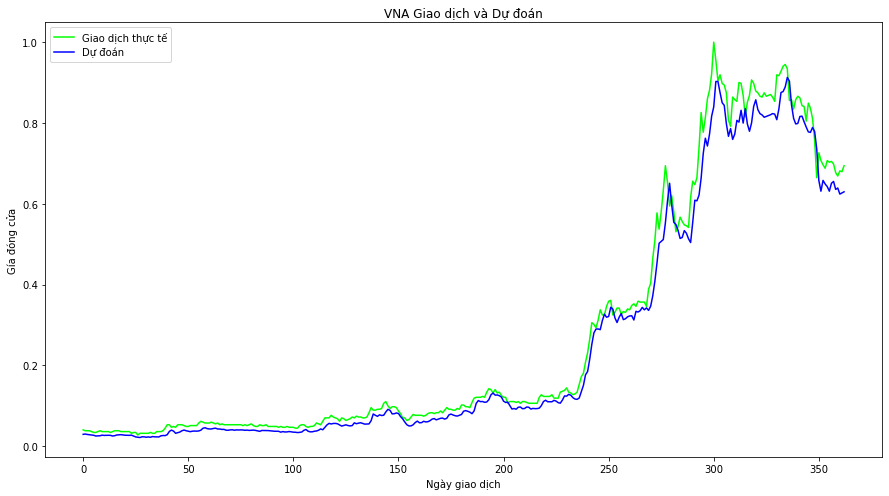

In [181]:
print('LSTM')
plot_prediction(target_test, predict_test_lstm2)

LINEAR


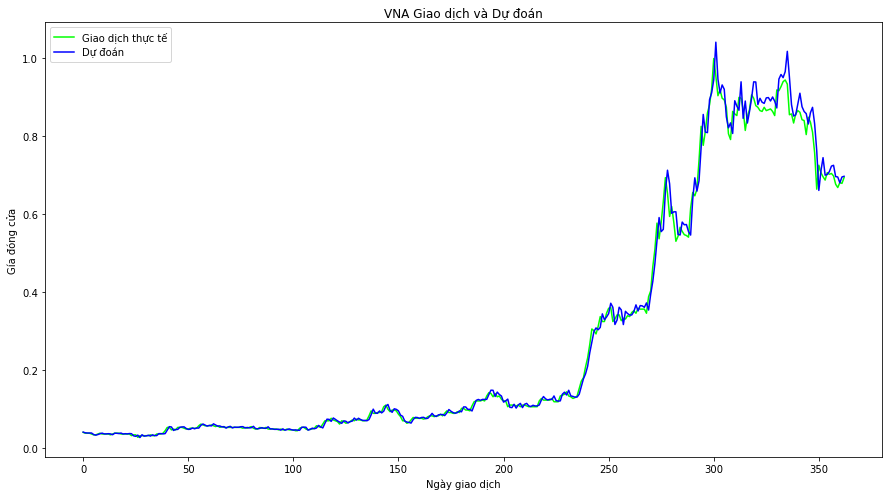

In [182]:
print('LINEAR')
plot_prediction(target_test, predict_test)

In [267]:
data = {'Target': target_test[:10], 'Linear': predict_test[:10], 'LSTM': predict_test_lstm2.flatten()[:10]}
result_df = pd.DataFrame(data)
result_df

,Target,Linear,LSTM
0,0.040340,0.041116,0.035649
1,0.038217,0.039197,0.037202
2,0.038217,0.038657,0.035089
3,0.038217,0.038738,0.035454
4,0.036093,0.038669,0.034546
5,0.033970,0.034754,0.033247
6,0.033970,0.033141,0.032443
7,0.036093,0.034708,0.031260
8,0.038217,0.036739,0.032024
9,0.036093,0.038390,0.032961


In [268]:
result_df['Change Linear'] = result_df['Linear'] - result_df['Target']
result_df['Change LSTM'] = result_df['LSTM'] - result_df['Target']

In [269]:
result_df

,Target,Linear,LSTM,Change Linear,Change LSTM
0,0.040340,0.041116,0.035649,0.000777,-0.004690
1,0.038217,0.039197,0.037202,0.000980,-0.001015
2,0.038217,0.038657,0.035089,0.000441,-0.003127
3,0.038217,0.038738,0.035454,0.000521,-0.002762
4,0.036093,0.038669,0.034546,0.002576,-0.001548
5,0.033970,0.034754,0.033247,0.000784,-0.000723
6,0.033970,0.033141,0.032443,-0.000829,-0.001527
7,0.036093,0.034708,0.031260,-0.001385,-0.004834
8,0.038217,0.036739,0.032024,-0.001478,-0.006193
9,0.036093,0.038390,0.032961,0.002297,-0.003133
